In [1]:
# libs

import pandas as pd
import numpy as np

import re
import requests, io
from bs4 import BeautifulSoup
import json
import dpath.util

import time
from tqdm.notebook import trange

import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import resize

%matplotlib inline

In [2]:
def print_worktime(start):
    
    duration = time.time() - start
    duration = round(duration / 60, 3)
    
    print(f"Код отработал за: {duration} минут")

# Поиск пути к блоку с изображениями

In [3]:
url = 'https://www.gapminder.org/dollar-street?zoom=6&p=4'
text = requests.get(url)
content = BeautifulSoup(text.text, "html.parser")

In [4]:
print(content.prettify()[:1000])

<!DOCTYPE html>
<html>
 <head>
  <script src="/cdn-cgi/apps/head/BA9wG71UcNHRZyqda6gYchEbuNM.js">
  </script>
  <link href="/dollar-street/static/favicons/favicon.ico" rel="icon" type="image/x-icon"/>
  <link href="/dollar-street/static/favicons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="/dollar-street/static/favicons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="/dollar-street/static/favicons/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="/dollar-street/static/favicons/site.webmanifest" rel="manifest"/>
  <link color="#ffcc55" href="/dollar-street/static/favicons/safari-pinned-tab.svg" rel="mask-icon"/>
  <meta content="#ffcc55" name="msapplication-TileColor"/>
  <meta content="/dollar-street/static/favicons/mstile-144x144.png" name="msapplication-TileImage"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="width=device-width" name="viewport"/>
  <meta charset="utf-8"/>
  <me

In [5]:
print(content.prettify()[:1000])

<!DOCTYPE html>
<html>
 <head>
  <script src="/cdn-cgi/apps/head/BA9wG71UcNHRZyqda6gYchEbuNM.js">
  </script>
  <link href="/dollar-street/static/favicons/favicon.ico" rel="icon" type="image/x-icon"/>
  <link href="/dollar-street/static/favicons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="/dollar-street/static/favicons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="/dollar-street/static/favicons/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="/dollar-street/static/favicons/site.webmanifest" rel="manifest"/>
  <link color="#ffcc55" href="/dollar-street/static/favicons/safari-pinned-tab.svg" rel="mask-icon"/>
  <meta content="#ffcc55" name="msapplication-TileColor"/>
  <meta content="/dollar-street/static/favicons/mstile-144x144.png" name="msapplication-TileImage"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="width=device-width" name="viewport"/>
  <meta charset="utf-8"/>
  <me

##### Блок с нужной информацией и изображениями находится по тегу **script** с аттрибутом **id="__NEXT_DATA__"**

##### Далее извлекаем данные из блока

In [6]:
json_data = content.find_all('script',id="__NEXT_DATA__")
json_data = json_data[0].contents[0]
json_data = json.loads(json_data)

In [7]:
json_data.keys()

dict_keys(['props', 'page', 'query', 'buildId', 'assetPrefix', 'isFallback', 'customServer', 'gip', 'appGip'])

In [8]:
print(dpath.util.search(json_data, '**/original'))

<ipython-input-8-3d477a9780b5>:1: DeprecationWarning: The dpath.util package is being deprecated. All util functions have been moved to dpath package top level.
  print(dpath.util.search(json_data, '**/original'))


{'props': {'pageProps': {'initialMobxState': {'thingStore': {'mediaRegistry': [{'images': {'original': 'https://media.dollarstreet.org/5d4bf04ccf0b3a0f3f354b30/5d4bf04ccf0b3a0f3f354b30.jpg'}}, {'images': {'original': 'https://media.dollarstreet.org/5ec4f87df0611d7ddd740f47/5ec4f87df0611d7ddd740f47.jpg'}}, {'images': {'original': 'https://media.dollarstreet.org/5ec4f7d3f0611d7ddd740977/5ec4f7d3f0611d7ddd740977.JPG'}}, {'images': {'original': 'https://media.dollarstreet.org/5d4be719cf0b3a0f3f344e46/5d4be719cf0b3a0f3f344e46.jpg'}}, {'images': {'original': 'https://media.dollarstreet.org/5d4be650cf0b3a0f3f34372f/5d4be650cf0b3a0f3f34372f.jpg'}}, {'images': {'original': 'https://media.dollarstreet.org/5d4be139cf0b3a0f3f33aaf3/5d4be139cf0b3a0f3f33aaf3.jpg'}}, {'images': {'original': 'https://media.dollarstreet.org/5d4bdef2cf0b3a0f3f336dcd/5d4bdef2cf0b3a0f3f336dcd.jpg'}}, {'images': {'original': 'https://media.dollarstreet.org/5d4bdf23cf0b3a0f3f3372df/5d4bdf23cf0b3a0f3f3372df.jpg'}}, {'images'

**Путь к изображениям**

props &rarr; pageProps &rarr; initialMobxState &rarr; thingStore &rarr; mediaRegistry &rarr; images

In [9]:
print('Всего изображений на 4 странице:', len(json_data['props']['pageProps']['initialMobxState']['thingStore']['mediaRegistry']))

Всего изображений на 4 странице: 60


In [10]:
data_page = json_data['props']['pageProps']['initialMobxState']['thingStore']['mediaRegistry']

In [11]:
data_page[0]

{'id': '5d4bf04ccf0b3a0f3f354b30',
 'images': {'original': 'https://media.dollarstreet.org/5d4bf04ccf0b3a0f3f354b30/5d4bf04ccf0b3a0f3f354b30.jpg',
  'uncropped': 'https://media.dollarstreet.org/5d4bf04ccf0b3a0f3f354b30/5d4bf04ccf0b3a0f3f354b30_raw.jpg',
  'cropped80': 'https://media.dollarstreet.org/5d4bf04ccf0b3a0f3f354b30/5d4bf04ccf0b3a0f3f354b30_80.jpg',
  'cropped180': 'https://media.dollarstreet.org/5d4bf04ccf0b3a0f3f354b30/5d4bf04ccf0b3a0f3f354b30_180.jpg',
  'cropped360': 'https://media.dollarstreet.org/5d4bf04ccf0b3a0f3f354b30/5d4bf04ccf0b3a0f3f354b30_360.jpg',
  'cropped640': 'https://media.dollarstreet.org/5d4bf04ccf0b3a0f3f354b30/5d4bf04ccf0b3a0f3f354b30_640.jpg',
  'full512': 'https://media.dollarstreet.org/5d4bf04ccf0b3a0f3f354b30/5d4bf04ccf0b3a0f3f354b30_512.jpg',
  'full1024': 'https://media.dollarstreet.org/5d4bf04ccf0b3a0f3f354b30/5d4bf04ccf0b3a0f3f354b30_1024.jpg',
  'full2048': 'https://media.dollarstreet.org/5d4bf04ccf0b3a0f3f354b30/5d4bf04ccf0b3a0f3f354b30_2048.jpg

# Функция парсера

In [12]:
def parser(page: int, topic: str, country: str = 'world', media: str = 'photos') -> pd.DataFrame:
    
    url_body = 'https://www.gapminder.org/dollar-street?'
    p = 'p=' + str(page)
    media = 'media=' + media
    topic_url = 'topic=' + topic
    country = 'country=' + country
    url = '&'.join((url_body, topic_url, country, media, p))
    
    text = requests.get(url)
    content = BeautifulSoup(text.text, "html.parser")
    json_data = content.find_all('script',id="__NEXT_DATA__")
    if json_data[0].contents is None:
        print('json_data[0].contents is None')
    elif json_data[0] is None:
        print('json_data[0] is None')
    elif json_data[0].contents[0] is None:
        print('json_data[0].contents[0] is None')
    json_data = json_data[0].contents[0]
    json_data = json.loads(json_data)
    data_page = json_data['props']['pageProps']['initialMobxState']['thingStore']['mediaRegistry']
    
    id_code = []
    images = []
    countries = []
    regions = []
    incomes = []
    
    for item in range(len(data_page)):
        images.append(data_page[item]['images']['full512'])
        countries.append(data_page[item]['country']['name'])
        regions.append(data_page[item]['region']['name'])
        incomes.append(data_page[item]['sortVal'])
        id_code.append(data_page[item]['id'])
        
    df = pd.DataFrame(columns = ['id', 'image', 'country', 'region', 'income'])
    df['id'] = id_code
    df['image'] = images
    df['country'] = countries
    df['region'] = regions
    df['income'] = incomes
    df['page'] = page
    df['topic'] = topic
    if df.shape[0] != 0:
        print(f'page №{page} of topic "{topic}"')
#     elif df.shape[0] == 0:
#         print(f'''page №{page} of topic "{topic}" doesn't exist!''')
        
    return df

In [13]:
first_page = parser(1, 'families')
first_page.head(2)

page №1 of topic "families"


,id,image,country,region,income,page,topic
0,5d4bf10dcf0b3a0f3f355e40,https://media.dollarstreet.org/5d4bf10dcf0b3a0...,Cote d'Ivoire,Africa,41.767077,1,families
1,5d4bedd4cf0b3a0f3f350566,https://media.dollarstreet.org/5d4bedd4cf0b3a0...,Thailand,Asia,178.836896,1,families


In [14]:
first_page.shape

(60, 7)

# Парсинг всех страниц и тем

In [15]:
pages = np.arange(0,11)
topics_all = ['families', 'adding-spices-to-food-while-cooking', 'alarm-clocks', 'alcoholic-drinks', 'answering-phones', 'arm-watches',
          'armchairs', 'backyards', 'bathroom-door', 'bathrooms', 'bedrooms', 'beds', 'bikes', 'boats', 'books', 'bowls', 'brushing-hair', 'brushing-teeth', 
         'car-keys', 'carrying-water', 'cars', 'ceilings', 'chickens', 'child-rooms', 'chopping-food', 'cleaning-equipment', 'cleaning-floors', 'closing-the-front-door',
          'computers', 'cooking', 'cooking-pots', 'cooking-utensils', 'cups', 'cutlery', 'diapers', 'dinner-guests', 'disability-aid','dish-brushes', 'dish-racks',
         'dish-washing-soaps', 'dishwashers', 'doing-dishes', 'drinking-social-drinks', 'drinking-water', 'drying-clothes', 'drying-dishes', 'earings', 
          'eating', 'everyday-shoes', 'family-snapshots', 'favorite-home-decorations', 'favourite-items-in-kitchen', 'floors', 'freezers', 'front-doors', 
          'frontdoor-keys', 'fruit-trees', 'fruits', 'get-water', 'glasses', 'go-through-mail', 'goats', 'grains', 'guest-beds', 'hair-brushes', 'hallways',
          'hand-washing', 'hands', 'hands-open-to-closed', 'hanging-clothes-to-dry', 'homes', 'house-overviews', 'how-the-most-loved-item-is-used', 'instruments',
          'jackets', 'jewelry', 'kids-bed', 'kids-playing-inside', 'kids-playing-outside', 'kitchen-sinks', 'kitchens', 'latest-furniture-bought', 'light-sources',
          'light-sources-in-livingroom', 'light-sources-kitchen', 'lightsources-by-bed,-reading-light', 'listening-to-radios', 'living-rooms', 'lock-on-front-doors',
          'make-up', 'meat', 'medication', 'menstruation-pads', 'mosquito-protections', 'most-loved-items', 'most-loved-toys', 'motorcycles', 'music-equipment', 
          'music-idols', 'necklaces', 'next-big-things-i-plan-to-buy', 'nicest-shoes', 'opening-and-closing-freezers', 'opening-and-closing-refrigerators', 
          'opening-the-front-door', 'ovens', 'palms', 'papers', 'parking-lots', 'pens', 'pet-foods', 'pets', 'phones', 'places-for-dinner', 
          'places-where-guests-are-served-dinner', 'plates', 'plates-of-food', 'play-areas', 'playing', 'playing-an-instrument', 'playing-with-most-loved-toys', 
          'plugging-into-and-out-of-power-outlet', 'pouring-water','power-outlets', 'power-switches', 'preparing-social-drink', 'putting-on-make-up', 'radios',
          'reading', 'reading-a-book,-seeing-the-back-of-book', 'reading-books,-looking-over-the-shoulder', 'refrigerators', 'roofs', 'rugs', 'salt', 'shampoo',
          'shaving', 'shoes', 'showers', 'sitting-and-watching-tv', 'sitting-areas', 'sleeping', 'smoking', 'soaps', 'social-drinks', 'socializing', 'sofas',
          'sources-of-cool', 'sources-of-heat', 'sources-of-light', 'spices', 'starting-stoves', 'steam-exits', 'storage-rooms', 'stoves', 'street-details',
          'street-view', 'tables-with-food', 'taking-teaspoons-of-salt', 'teeth', 'things-i-dream-of-having', 'throwing-food-trash-away', 'toilet-paper', 
          'toilets', 'tools', 'tooth-paste', 'toothbrushes', 'toothpaste-on-toothbrushes', 'toys', 'trash', 'turn-tv-on', 'turning-fan/ac-on', 'turning-heaters-on', 
          'turning-lights-on-and-off', 'tvs', 'using-most-loved-items', 'using-toilet', 'vegetable-plots', 'vegetables', 'walking-through-homes', 'walking-to-get-water',
          'walking-towards-front-door', 'wall-clocks', 'wall-decorations', 'walls', 'walls-inside', 'wardrobes','washing-clothes', 'washing-detergent',
          'washing-hands', 'waste-dumps', 'water-outlets', 'what-i-wish-i-could-buy', 'wheel-barrows', 'work-areas', 'worship-places', 'worshipping', 'writing', 
          'writing-"home"']

In [16]:
hands = ['palms', 'hands', '']
hands

['palms', 'hands', '']

In [17]:
teeth = ['teeth']

In [18]:
rooms = ['bathrooms', 'bedrooms', 'child-rooms',
         'kitchens', 'living-rooms', 'storage-rooms', 'toilets'] 

In [19]:
# фото самой семьи, отдельно детей и их игрушек, жилища, одежды
topics = ['families', 'child-rooms', 'homes', 'house-overviews', 'pets', 'toys', 'most-loved-toys', 'playing-with-most-loved-toys']

In [20]:
import tqdm

In [45]:
start = time.time()

df_teeth = pd.DataFrame(columns=first_page.columns)

for t,s in zip(teeth, trange(len(hands)-1)):
    for p in pages:
        
        page = parser(page=p, topic=t)
        df_teeth = pd.concat([df_teeth, page])
        
print_worktime(start)

page №0 of topic "teeth"
page №1 of topic "teeth"
page №2 of topic "teeth"
page №3 of topic "teeth"
page №4 of topic "teeth"
page №5 of topic "teeth"
page №6 of topic "teeth"

Код отработал за: 0.401 минут


In [46]:
start = time.time()

df_hands = pd.DataFrame(columns=first_page.columns)

for t,s in zip(hands, trange(len(hands)-1)):
    for p in pages:
        
        page = parser(page=p, topic=t)
        df_hands = pd.concat([df_hands, page])
        
print_worktime(start)

page №0 of topic "palms"
page №1 of topic "palms"
page №2 of topic "palms"
page №3 of topic "palms"
page №4 of topic "palms"
page №5 of topic "palms"
page №6 of topic "palms"
page №0 of topic "hands"
page №1 of topic "hands"
page №2 of topic "hands"
page №3 of topic "hands"
page №4 of topic "hands"
page №5 of topic "hands"
page №6 of topic "hands"

Код отработал за: 0.192 минут


In [47]:
df_hands.topic.value_counts()

palms    409
hands    408
Name: topic, dtype: int64

In [48]:
# нужно раскомментить, чтобы сохранить дф

# df_hands.to_excel('parsered_ds.xlsx')

In [49]:
print(df_hands.shape)
print(df_hands.describe())
print(df_hands.dtypes)
df_hands.sample(2)

(817, 7)
             income
count    817.000000
mean    1273.906648
std     1763.024734
min       26.994581
25%      152.444617
50%      510.000000
75%     1737.000000
max    14753.000000
id          object
image       object
country     object
region      object
income     float64
page        object
topic       object
dtype: object


,id,image,country,region,income,page,topic
40,5d4bee33cf0b3a0f3f350f58,https://media.dollarstreet.org/5d4bee33cf0b3a0...,Rwanda,Africa,72.459433,5,hands
28,5ec4f5e3f4a4fb7dc0387afa,https://media.dollarstreet.org/5ec4f5e3f4a4fb7...,Sri Lanka,Asia,125.000000,4,hands


In [50]:
for t in hands:
    if t not in df_hands.topic.unique():
        print(t)

# Вывод и сохранение изображений

In [51]:
path = r'D:\path\for\images\\'

In [52]:
df_hands['image'].iloc[0]

'https://media.dollarstreet.org/5d4bf463cf0b3a0f3f35b8e6/5d4bf463cf0b3a0f3f35b8e6_512.jpg'

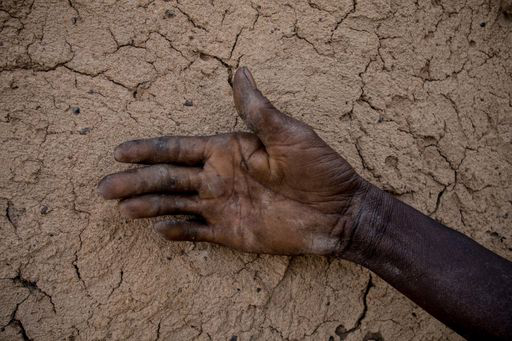

In [53]:
image = df_hands['image'].iloc[0]
image = requests.get(image).content
image = plt.imread(io.BytesIO(image), format='JPG')
result = Image.fromarray((image).astype(np.uint8))
result

In [54]:
def im_loader(df: pd.DataFrame):
    
    for i, s in zip(range(df.shape[0]+1), tqdm.notebook.tqdm(range(df.shape[0]))):
        image = df['image'].iloc[i]
        image = requests.get(image).content
        image = plt.imread(io.BytesIO(image), format='JPG')
        result = Image.fromarray((image).astype(np.uint8))
        result = result.convert('RGB')
        result.save(path + df['id'].iloc[i] + '.jpg')

def im_loader_to_matrix(df: pd.DataFrame):
    matricies_of_images = list()
    for i, s in zip(range(df.shape[0]+1), tqdm.notebook.tqdm(range(df.shape[0]))):
        image = df['image'].iloc[i]
        image = requests.get(image).content
        image = plt.imread(io.BytesIO(image), format='JPG')
        matricies_of_images.append(image)
    
    df['image_matricies'] = matricies_of_images

In [55]:
start = time.time()

im_loader_to_matrix(df_hands)
im_loader_to_matrix(df_teeth)

print_worktime(start)


Код отработал за: 6.672 минут


In [56]:
df_hands['image_matricies'].iloc[1].shape

(341, 512, 3)

In [57]:
df_teeth['image_matricies'].iloc[1].shape

(341, 512, 3)

In [58]:
df_hands.income.describe()

count      817.000000
mean      1273.906648
std       1763.024734
min         26.994581
25%        152.444617
50%        510.000000
75%       1737.000000
max      14753.000000
Name: income, dtype: float64

In [59]:
quantiles_hands = np.quantile(df_hands.income, np.arange(0,1,0.2))
quantiles_teeth = np.quantile(df_teeth.income, np.arange(0,1,0.2))

In [60]:
for i in range(1,len(quantiles_hands)):
    print(i)

1
2
3
4


In [61]:
def income_ranges(x: float, quantiles) -> int:
    

    for i in range(1,len(quantiles)):
        if x < quantiles[1]:
            return 1
        elif x >= quantiles[i-1] and x < quantiles[i]:
            return i
        elif x > quantiles[-1]:
            return len(quantiles)

In [62]:
df_hands['income_range'] = df_hands.income.apply(lambda x: income_ranges(x, quantiles_hands))
df_teeth['income_range'] = df_teeth.income.apply(lambda x: income_ranges(x, quantiles_teeth))

In [63]:
quantiles

array([  26.99458113,  121.57295604,  306.        ,  844.        ,
       2194.067544  ])

In [64]:
df_hands.income_range.value_counts()

1.0    164
4.0    163
5.0    163
3.0    163
2.0    162
Name: income_range, dtype: int64

In [65]:
df_hands.dropna(inplace=True)
df_teeth.dropna(inplace=True)

In [66]:
df_hands.shape

(815, 9)

In [67]:
labels_hands = np.array(list(df_hands['income_range']))
images_hands = np.array(list(df_hands['image_matricies']))

labels_teeth = np.array(list(df_teeth['income_range']))
images_teeth = np.array(list(df_teeth['image_matricies']))

<ipython-input-67-d31577070f7e>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  images_hands = np.array(list(df_hands['image_matricies']))
<ipython-input-67-d31577070f7e>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  images_teeth = np.array(list(df_teeth['image_matricies']))


In [68]:
np.save('hands_images', images_hands)
np.save('hands_labels', labels_hands)

np.save('teeth_images', images_teeth)
np.save('teeth_labels', labels_teeth)

In [ ]:
# df.to_excel('parsered_ds.xlsx')